# Entrenament #

: dividir el conjunt de dades, codificar variables categòriques, estandarditzar les característiques i reduir la dimensionalitat del conjunt de dades. Recorda quin conjunt de dades has d'utilitzar a cada moment.

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sweetviz as sv
import seaborn as sns
sns.set(style='whitegrid')
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder

# Modelos de machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

import warnings

# Suprimir todas las advertencias
warnings.filterwarnings('ignore')

from scipy import stats

In [92]:
banc_transformed= pd.read_csv ('banc_transformed.csv') # carreguem el dataset
banc_transformed.head(10) # mostrem les primeres files

,deposit,age,balance,duration,campaign,pdays,default_numeric,housing_numeric,loan_numeric,contact_previ_numeric,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,yes,1.176471,1.130517,2.198324,-0.5,0.0,0,1,0,0,...,False,False,False,False,False,False,True,False,False,False
1,yes,1.000000,-0.318411,3.385475,-0.5,0.0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
2,yes,0.117647,0.453972,3.167598,-0.5,0.0,0,1,0,0,...,False,False,False,False,False,False,True,False,False,False
3,yes,0.941176,1.214376,0.905028,-0.5,0.0,0,1,0,0,...,False,False,False,False,False,False,True,False,False,False
4,yes,0.882353,-0.230769,1.167598,0.0,0.0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
5,yes,0.176471,-0.346784,0.857542,0.0,0.0,0,1,1,0,...,False,False,False,False,False,False,True,False,False,False
6,yes,1.000000,0.176545,2.642458,-0.5,0.0,0,1,1,0,...,False,False,False,False,False,False,True,False,False,False
7,yes,1.235294,-0.003153,2.164804,-0.5,0.0,0,1,0,0,...,False,False,False,False,False,False,True,False,False,False
8,yes,-0.117647,-0.346154,0.986034,-0.5,0.0,0,1,0,0,...,False,False,False,False,False,False,True,False,False,False
9,yes,-0.647059,2.862547,2.910615,0.5,0.0,0,1,0,0,...,False,False,False,False,False,False,True,False,False,False


In [93]:

# Convertir la variable 'deposit' a formato numérico
banc_transformed['deposit'] = banc_transformed['deposit'].map({'no': 0, 'yes': 1})


In [94]:
banc_transformed.describe()

,deposit,age,balance,duration,campaign,pdays,default_numeric,housing_numeric,loan_numeric,contact_previ_numeric
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,0.473840,0.131481,0.616985,0.326798,0.254211,2.509694,0.015051,0.473123,0.130801,0.254256
std,0.499338,0.700565,2.033678,0.969632,1.361039,5.224082,0.121761,0.499299,0.337198,0.435461
min,0.000000,-1.235294,-4.663934,-0.706704,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.411765,-0.269861,-0.326816,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.588235,0.730139,0.673184,0.500000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,3.294118,50.853720,10.128492,30.500000,41.156627,1.000000,1.000000,1.000000,1.000000


In [95]:
target='deposit'

# Separar las variables independientes (features) y la variable dependiente (target)
X = banc_transformed.drop(columns=[target])  # Features
y = banc_transformed[target]  # Target

In [96]:
from sklearn.model_selection import train_test_split

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Best params for logistic: {'classifier__C': 1, 'classifier__penalty': 'l2'}
Best params for decision_tree: {'classifier__max_depth': 10}
Best params for random_forest: {'classifier__max_depth': 20, 'classifier__n_estimators': 100}
Best params for gradient_boosting: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 200}
Best params for xgboost: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 100}
--- logistic ---
Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83      1762
           1       0.81      0.79      0.80      1587

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349

Confusion Matrix:
 [[1477  285]
 [ 338 1249]]




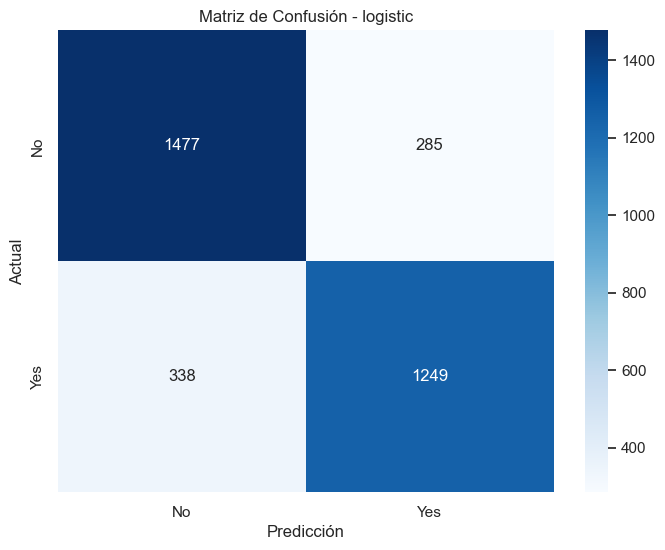

--- decision_tree ---
Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      1762
           1       0.81      0.76      0.78      1587

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349

Confusion Matrix:
 [[1473  289]
 [ 378 1209]]




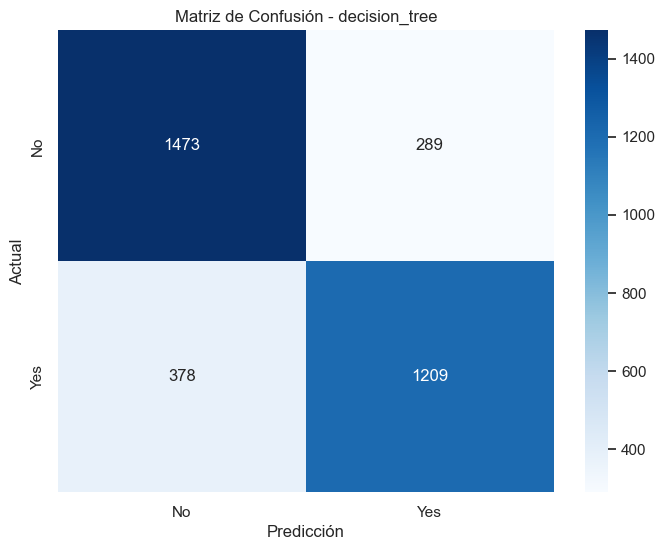

--- random_forest ---
Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      1762
           1       0.80      0.87      0.83      1587

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.84      0.84      0.84      3349

Confusion Matrix:
 [[1423  339]
 [ 207 1380]]




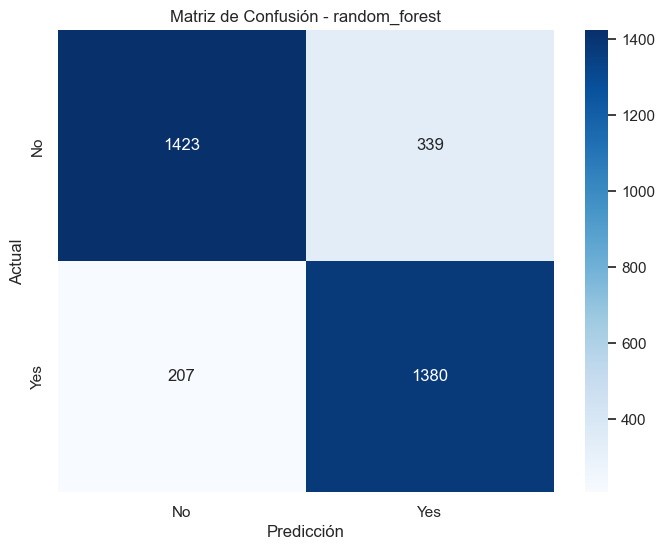

--- gradient_boosting ---
Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      1762
           1       0.82      0.84      0.83      1587

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.84      0.84      0.84      3349

Confusion Matrix:
 [[1475  287]
 [ 251 1336]]




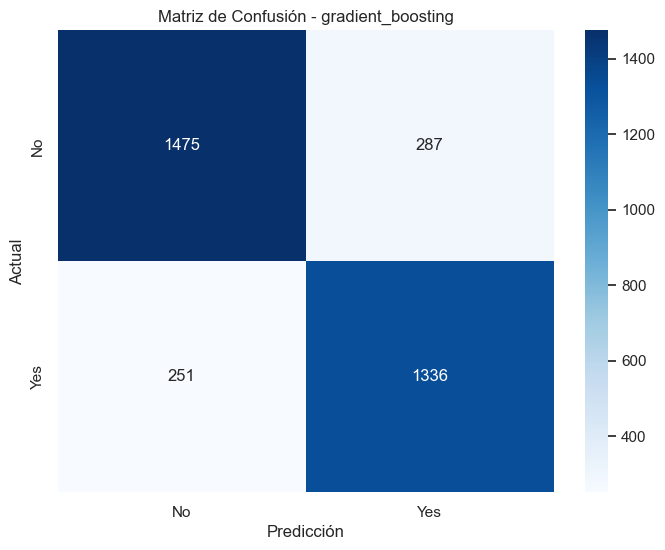

--- xgboost ---
Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      1762
           1       0.82      0.85      0.84      1587

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.84      0.84      0.84      3349

Confusion Matrix:
 [[1463  299]
 [ 232 1355]]




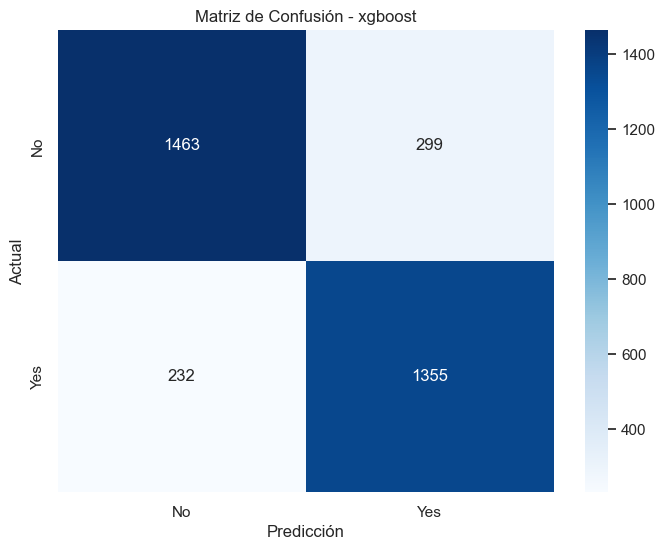

In [99]:
# Defino los modelos elegidos
models = {
    'logistic': LogisticRegression(random_state=42, max_iter=1000),
    'decision_tree': DecisionTreeClassifier(),
    'random_forest': RandomForestClassifier(),
    'gradient_boosting': GradientBoostingClassifier(),
    'xgboost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Creo una pipeline 
pipelines = {name: Pipeline([
    ('classifier', model)
]) for name, model in models.items()}

# Defino los parámetros para Grid Search
param_grids = {
    'logistic': {
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2']
    },
    'decision_tree': {
        'classifier__max_depth': [None, 10, 20, 30]
    },
    'random_forest': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10, 20]
    },
    'gradient_boosting': {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1]
    },
    'xgboost': {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1]
    }
}

# Aplico los mejores resultados para Grid Search para cada modelo a fin de evaluar el rendimiento
best_estimators = {}
for name, pipeline in pipelines.items():
    if name in param_grids:
        grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_estimators[name] = grid_search.best_estimator_
        print(f'Best params for {name}: {grid_search.best_params_}')
    else:
        pipeline.fit(X_train, y_train)
        best_estimators[name] = pipeline

# Evaluación de los modelos
for name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Calculo de la matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)
    
 
    print(f'--- {name} ---')
    print(f'Accuracy: {score:.2f}')
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", conf_matrix)
    print("\n")

    # Visualización de la matriz de confusión
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.ylabel('Actual')
    plt.xlabel('Predicción')
    plt.title(f'Matriz de Confusión - {name}')
    plt.show()

## Análisis de los resultados de los modelos ##

Los modelos de Random Forest, Gradient Boosting, y XGBoost tienen un rendimiento superior (84% de precisión).
Precisión y Recall: Prefiero basarme en el Recall para detectar todos los casos positivos, incluso a costa de tener algunos falsos positivos. En el momento de intentar conseguir más subscripciones para depósitos. (si se tratara de un tema médico, sería crucial evitar falsos positivos pero no es el caso).   

Decido elegir el modelo **Random Forest**, puesto que su rendimiento es sólido y equilibrado en precisión y recall (uno de los valores más altos 87%).  
Ofrece menor riesgo de sobreajuste y más fácil de interpretar que algunos otros modelos. 

Para Acceder al mejor modelo de Random Forest: best_random_forest_model = best_estimators['random_forest']


## Visualización de Curvas con el Modelo Entrenado ##

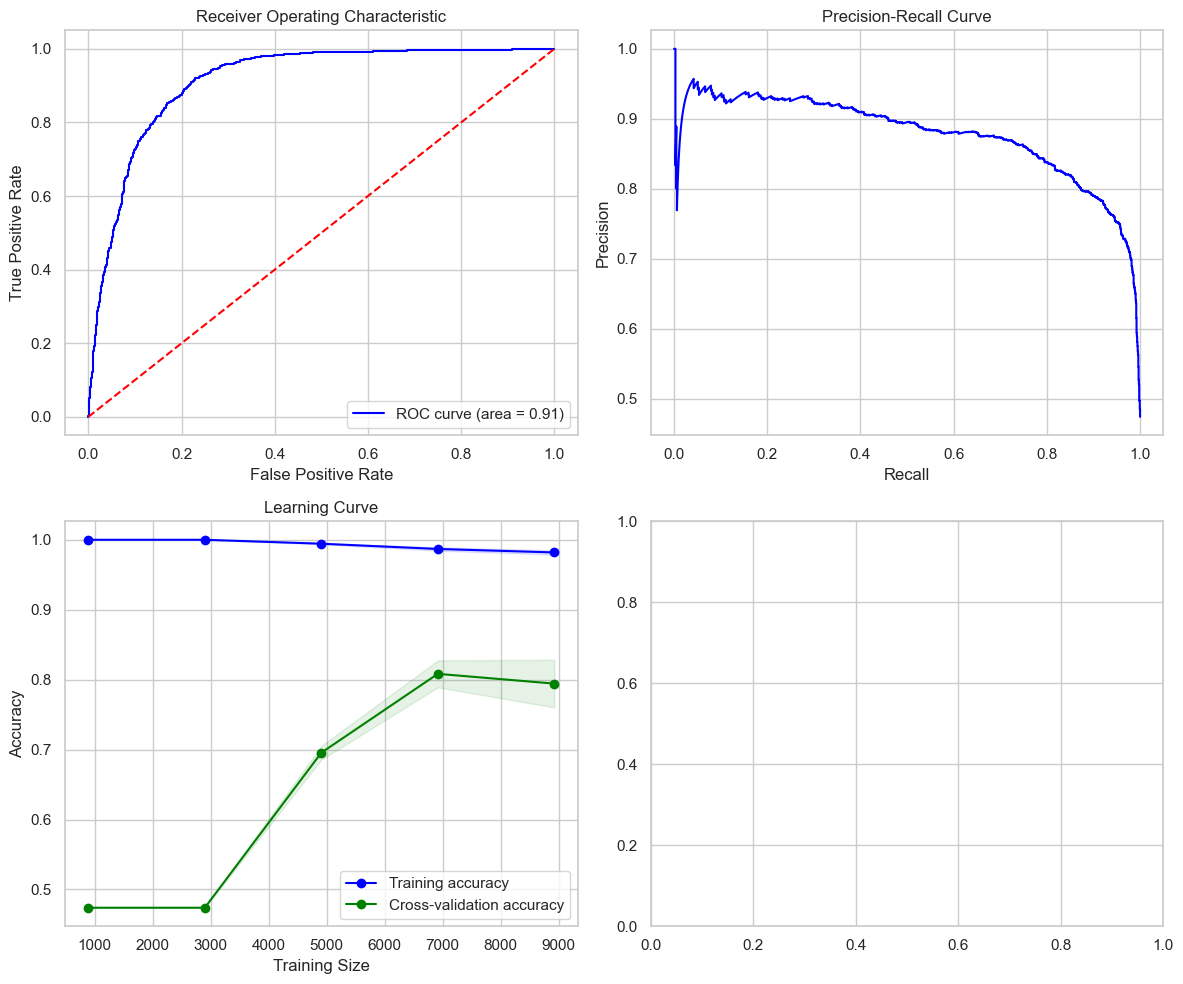

In [103]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.model_selection import learning_curve

# Obtener el mejor modelo
rf_model = best_estimators['random_forest']

# Predecir probabilidades en el conjunto de prueba
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Calcular la curva de precisión-recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Generar las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(rf_model, X, y, cv=5, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Crear la figura con subtramas
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Curva ROC
axs[0, 0].plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 0].plot([0, 1], [0, 1], color='red', linestyle='--')
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('Receiver Operating Characteristic')
axs[0, 0].legend(loc='lower right')

# Curva de Precisión-Recall
axs[0, 1].plot(recall, precision, color='blue')
axs[0, 1].set_xlabel('Recall')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_title('Precision-Recall Curve')

# Curvas de Aprendizaje
axs[1, 0].plot(train_sizes, train_mean, color='blue', marker='o', label='Training accuracy')
axs[1, 0].plot(train_sizes, test_mean, color='green', marker='o', label='Cross-validation accuracy')
axs[1, 0].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
axs[1, 0].fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.1)
axs[1, 0].set_title('Learning Curve')
axs[1, 0].set_xlabel('Training Size')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].legend()

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
plt.show()


Curva Roc: Comprobamos que el AUC esta en el 0.91 lo que es casi un Excelente rendimiento. Si hubiera salido un resultado de 0.5 , nos indicaría que el modelo no tiene poder predictivo.   
Recall-Precision: Perspectiva sobre cómo se comporta el modelo en cuanto a los positivos (en este caso, la clase 'yes'). Se mantiene con mucha precisón hasta recall 0.8 que empieza a bajar.  
Curva de aprendizaje: Referente a la cantidad de datos para el entrenamiento, sabemos que tenemos 7.813 datos. En el gráfico nos muestra que lo óptimo serian unos 6500 quizás. Vamos a contemplar la reducción de componentes por PCA, puesto que empieza a bajar el rendimiento a partir de las 7000 entradas. 

In [104]:
# Tamaño del conjunto de entrenamiento y prueba
print(f'Tamaño del conjunto de entrenamiento: {X_train.shape[0]}')
print(f'Tamaño del conjunto de prueba: {X_test.shape[0]}')


Tamaño del conjunto de entrenamiento: 7813
Tamaño del conjunto de prueba: 3349


### Reducció de dimensionalitat amb PCA ###

In [ ]:
PCA (aprenentatge no supervisat).

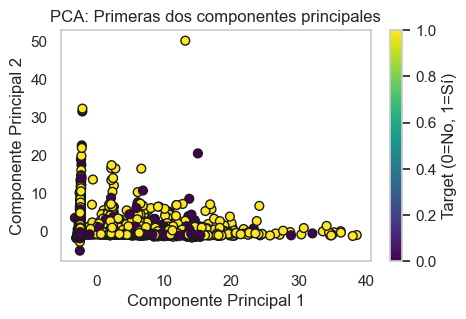

Varianza explicada por las componentes principales: [0.70900494 0.09219978]
Varianza total explicada: 0.8012047176956244


In [107]:
from sklearn.decomposition import PCA

# Inicializar PCA y ajustar al conjunto de datos
pca = PCA(n_components=2)  # Reducimos a 2 componentes principales
X_train_pca = pca.fit_transform(X_train)

# Visualizar las dos primeras componentes principales
plt.figure(figsize=(5, 3))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=40)
plt.title('PCA: Primeras dos componentes principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Target (0=No, 1=Sí)')
plt.grid()
plt.show()

# Mostrar la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por las componentes principales: {explained_variance}")
print(f"Varianza total explicada: {sum(explained_variance)}")

Accuracy: 0.5986861749776052
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.65      0.63      1762
           1       0.58      0.55      0.56      1587

    accuracy                           0.60      3349
   macro avg       0.60      0.60      0.60      3349
weighted avg       0.60      0.60      0.60      3349

Confusion Matrix:
 [[1140  622]
 [ 722  865]]


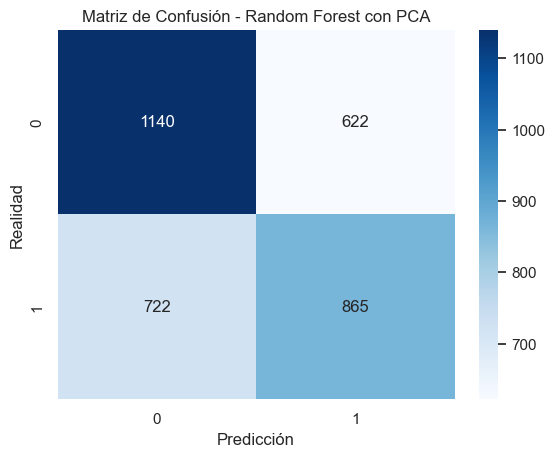

In [106]:
# Aplicar PCA
pca = PCA(n_components=2)  # Cambia el número de componentes según necesites
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Entrenar el modelo de Random Forest con los datos transformados por PCA
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_pca, y_train)

# Predecir sobre el conjunto de prueba
y_pred_pca = rf_model.predict(X_test_pca)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred_pca))
print("Classification Report:\n", classification_report(y_test, y_pred_pca))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_pca))

# Visualizar la matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred_pca), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.title("Matriz de Confusión - Random Forest con PCA")
plt.show()

Como vemos, todos los valores han empeorado: Accuracy: 0.598, no ha valido la pena aplicar reducción de dimensionalidad. 

In [109]:
import joblib
# Acceder al mejor modelo de Random Forest
best_random_forest_model = best_estimators['random_forest']

# Guardar el modelo de Random Forest
joblib.dump(best_random_forest_model, 'random_forest_model.pkl')
print("Modelo de Random Forest guardado exitosamente.")


Modelo de Random Forest guardado exitosamente.
